# Will Employee Leave the Company ?

## Import Important Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

## Read And Explore Dataset

In [2]:
dataset = pd.read_csv("Employee.csv")
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
dataset.shape

(14999, 10)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Checking for number of NaN values

In [6]:
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Exploratory Data Analysis

### Finding the correlation between features

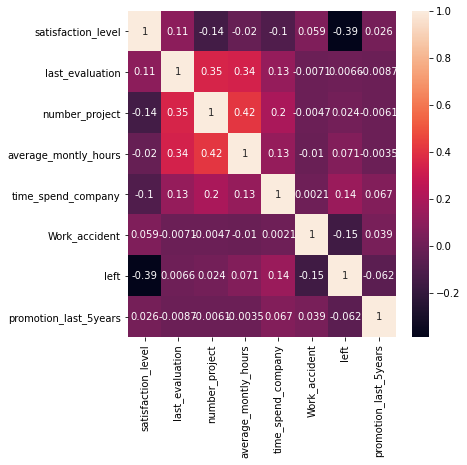

In [7]:
plt.figure(figsize= (6,6))
sn.heatmap(dataset.corr(), annot = True)
plt.show()

### Finding the correlation with target variable

In [8]:
dataset.corrwith(dataset["left"]).sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
dtype: float64

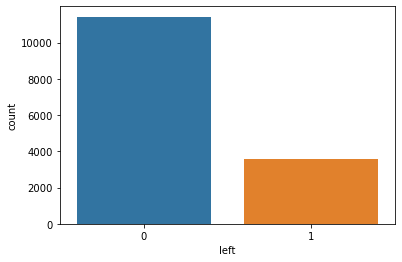

In [9]:
sn.countplot(x= dataset["left"])
plt.show()

### Number of Distinct Departments

In [10]:
dataset["Department"].nunique()

10

## Number of Employee per department

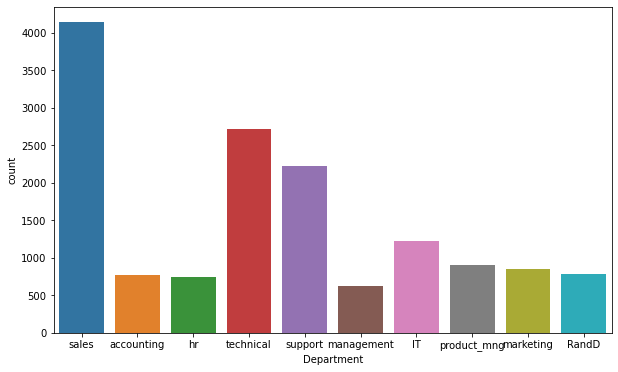

In [11]:
plt.figure(figsize=(10,6))
sn.countplot(x=dataset["Department"])
plt.show()

### Department wise Salary comparision

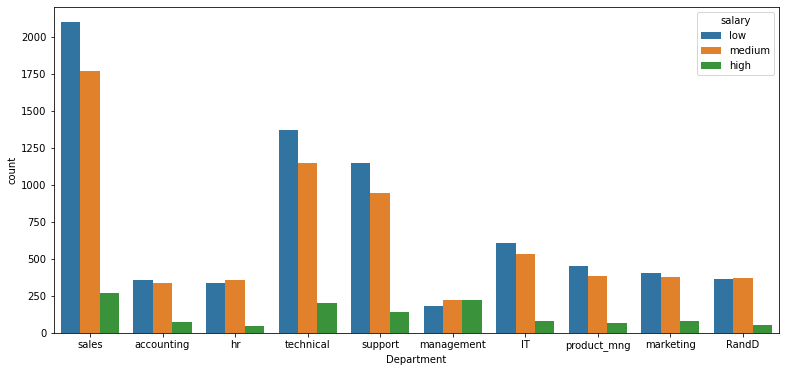

In [12]:
plt.figure(figsize=(13,6))
sn.countplot(x="Department", hue="salary", data=dataset)
plt.show()

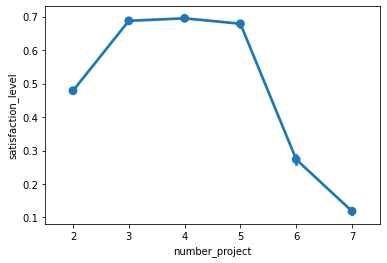

In [13]:
sn.pointplot(x=dataset["number_project"],y=dataset["satisfaction_level"])
plt.show()

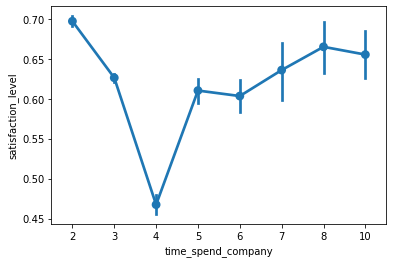

In [14]:
sn.pointplot(x=dataset["time_spend_company"],y=dataset["satisfaction_level"])
plt.show()

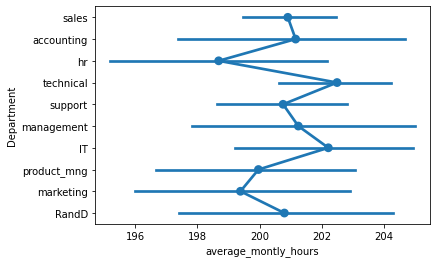

In [15]:
sn.pointplot(x=dataset["average_montly_hours"],y=dataset["Department"])
plt.show()

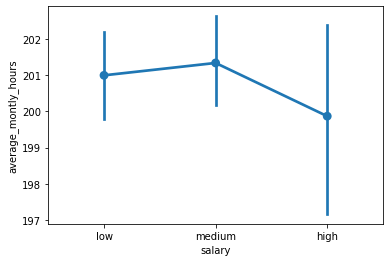

In [16]:
sn.pointplot(x=dataset["salary"], y = dataset["average_montly_hours"])
plt.show()

## Salary VS Count

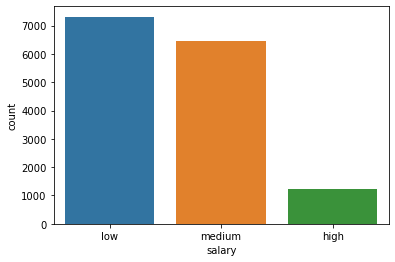

In [17]:
sn.countplot(x= dataset["salary"])
plt.show()

## Data Cleaning

### Converting Categorical Variables to numeric

In [18]:
low, medium, high = 1, 2, 3
dataset["salary"] = dataset["salary"].replace({"low":low, "medium":medium, "high":high})

In [19]:
dummy_data = pd.get_dummies(dataset["Department"])
dummy_data.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [20]:
dataset = pd.concat([dataset.drop("Department", axis=1), dummy_data], axis=1)
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [21]:
X, y = dataset.drop("left", axis=1), dataset["left"] 

## Strandlising Data

In [22]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
X = sc_scale.fit_transform(X)
pickle.dump(sc_scale, open('sc_scaler.pkl','wb'))

## Spliting the data into train and test data

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Using Support Vector Machine Algorithm

In [24]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel="rbf", random_state=1)
svc_classifier.fit(X_train, y_train)

SVC(random_state=1)

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy of SVM Classifier : ", round(accuracy_score(y_test, svc_classifier.predict(X_test))*100), "%")

Accuracy of SVM Classifier :  95.0 %


## Using Logistic Regression Algorithm

In [26]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [27]:
print("Accuracy of Logistic Regression Classifier : ", round(accuracy_score(y_test, lr_classifier.predict(X_test))*100), "%")

Accuracy of Logistic Regression Classifier :  79.0 %


## Using KNN Algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
print("Accuracy of KNN Classifier : ", round(accuracy_score(y_test, lr_classifier.predict(X_test))*100), "%")

Accuracy of KNN Classifier :  79.0 %


## Using Random Forest Algorithm

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=120)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [31]:
print("Accuracy of Random Forest Classifier : ", round(accuracy_score(y_test, rf_classifier.predict(X_test))*100), "%")

Accuracy of Random Forest Classifier :  99.0 %


## Using XG Boost Algorithm

In [32]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:35:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print("Accuracy of XGBoost Classifier : ", round(accuracy_score(y_test, xgb_classifier.predict(X_test))*100), "%")

Accuracy of XGBoost Classifier :  99.0 %


## Creating Artificial Neural Network

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU

In [35]:
classifier = Sequential()

In [36]:
classifier.add(Dense(input_dim=18, units=10, kernel_initializer="he_uniform", activation="relu"))
classifier.add(Dense(units=8, kernel_initializer="he_uniform", activation="relu"))
classifier.add(Dense(units=6, kernel_initializer="he_uniform", activation="relu"))
classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))

In [37]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 339
Trainable params: 339
Non-trainable params: 0
_________________________________________________________________


In [38]:
classifier.compile(optimizer="Adamax", loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
ann_classifier = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.2, epochs=200)

Epoch 1/200
840/840 [==============================] - 1s 1ms/step - loss: 0.6319 - accuracy: 0.6488 - val_loss: 0.4806 - val_accuracy: 0.7833
Epoch 2/200
840/840 [==============================] - 1s 1ms/step - loss: 0.4330 - accuracy: 0.8063 - val_loss: 0.3788 - val_accuracy: 0.8471
Epoch 3/200
840/840 [==============================] - 1s 1ms/step - loss: 0.3643 - accuracy: 0.8606 - val_loss: 0.3303 - val_accuracy: 0.8986
Epoch 4/200
840/840 [==============================] - 1s 1ms/step - loss: 0.3266 - accuracy: 0.8908 - val_loss: 0.3024 - val_accuracy: 0.9038
Epoch 5/200
840/840 [==============================] - 1s 1ms/step - loss: 0.3017 - accuracy: 0.8993 - val_loss: 0.2846 - val_accuracy: 0.9090
Epoch 6/200
840/840 [==============================] - 1s 1ms/step - loss: 0.2846 - accuracy: 0.9044 - val_loss: 0.2698 - val_accuracy: 0.9081
Epoch 7/200
840/840 [==============================] - 1s 1ms/step - loss: 0.2705 - accuracy: 0.9075 - val_loss: 0.2599 - val_accuracy: 0.9143

In [40]:
y_predict = classifier.predict(X_test)
y_predict = y_predict>0.5

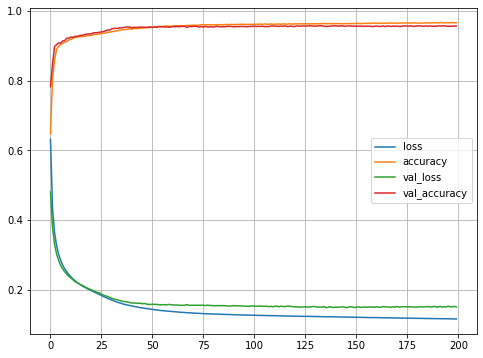

In [41]:
pd.DataFrame(ann_classifier.history).plot(figsize=(8,6))
plt.grid(True)
plt.show()

In [42]:
print("Accuracy of ANN Classifier : ", round(accuracy_score(y_test, y_predict)*100), "%")

Accuracy of ANN Classifier :  96.0 %


In [43]:
print("Accuracy of All Models : ")

print("Accuracy of SVM Classifier : ", accuracy_score(y_test, svc_classifier.predict(X_test))*100, "%")
print("Accuracy of Logistic Regression Classifier : ", accuracy_score(y_test, lr_classifier.predict(X_test))*100, "%")
print("Accuracy of KNN Classifier : ", accuracy_score(y_test, lr_classifier.predict(X_test))*100, "%")
print("Accuracy of Random Forest Classifier : ", accuracy_score(y_test, rf_classifier.predict(X_test))*100, "%")
print("Accuracy of XGBoost Classifier : ", accuracy_score(y_test, xgb_classifier.predict(X_test))*100, "%")
print("Accuracy of ANN Classifier : ", accuracy_score(y_test, y_predict)*100, "%")

Accuracy of All Models : 
Accuracy of SVM Classifier :  94.97777777777779 %
Accuracy of Logistic Regression Classifier :  79.35555555555555 %
Accuracy of KNN Classifier :  79.35555555555555 %
Accuracy of Random Forest Classifier :  98.93333333333332 %
Accuracy of XGBoost Classifier :  98.6 %
Accuracy of ANN Classifier :  95.8 %


## Saving the best model

In [46]:
pickle.dump(rf_classifier, open("hr_analytics_model.pkl",'wb'))